In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import efficientnet
import efficientnet.tfkeras as efn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow_addons as tfkeras
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2 as cv                 # opecv (이미지 resize)
from tensorflow.keras import backend as K

train_dir = './data/team_made'

# ImageDataGenerator를 생성해요!
# RGB 값(0~255로 구성)으로 각 픽셀의 값을 나눠서 정규화 (MinMaxScaling)
train_datagen = ImageDataGenerator(rescale=1/255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], # 폴더명을 class로 잡는다.
                              # 따로 명시하지 않으면 오름차순으로 명시  
    target_size=(150,150),
    batch_size=20,            # 한번에 20개 가져온다. 많아서 한번에 못들고 옴
    class_mode='sparse',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,                 # target directory
    classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], # 폴더명을 class로 잡는다.
    target_size=(150,150),
    batch_size=20,
    class_mode='sparse',
    subset='validation')

C:\Users\jiwon\.conda\envs\machine_TF2\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Found 8700 images belonging to 24 classes.
Found 2169 images belonging to 24 classes.


In [2]:
# pretrained network

pretrained_network = efn.EfficientNetB4(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3))

print(pretrained_network.summary())

pretrained_network.trainable = False

# keras 구현
# model 구현

model = Sequential()

model.add(pretrained_network)

model.add(GlobalAveragePooling2D())

model.add(Dense(units=24,
                activation='softmax'))  # 10개의 class당 확률값이 나옴

# Early Stopping
es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   patience=5,
                   verbose=1)

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)//20,
                    steps_per_epoch=len(train_generator)//20,
                    epochs=50,
                    verbose=1)

Model: "efficientnet-b4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 75, 75, 48)   1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 75, 75, 48)   192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 75, 75, 48)   0           stem_bn[0][0]                    
____________________________________________________________________________________

__________________________________________________________________________________________________
block6c_project_bn (BatchNormal (None, 5, 5, 272)    1088        block6c_project_conv[0][0]       
__________________________________________________________________________________________________
block6c_drop (FixedDropout)     (None, 5, 5, 272)    0           block6c_project_bn[0][0]         
__________________________________________________________________________________________________
block6c_add (Add)               (None, 5, 5, 272)    0           block6c_drop[0][0]               
                                                                 block6b_add[0][0]                
__________________________________________________________________________________________________
block6d_expand_conv (Conv2D)    (None, 5, 5, 1632)   443904      block6c_add[0][0]                
__________________________________________________________________________________________________
block6d_ex

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
21/21 [==============================] - 31s 1s/step - loss: 2.6949 - accuracy: 0.2667 - val_loss: 1.9542 - val_accuracy: 0.6200
Epoch 2/50
21/21 [==============================] - 27s 1s/step - loss: 1.8803 - accuracy: 0.6119 - val_loss: 1.4287 - val_accuracy: 0.8000
Epoch 3/50
21/21 [==============================] - 29s 1s/step - loss: 1.3949 - accuracy: 0.7238 - val_loss: 1.1454 - val_accuracy: 0.8600
Epoch 4/50
21/21 [==============================] - 28s 1s/step - loss: 1.1224 - accuracy: 0.8571 - val_loss: 0.8631 - val_accuracy: 0.8900
Epoch 5/50
21/21 [==============================] - 27s 1s/step - loss: 0.8603 - accuracy: 0.8690 - val_loss: 0.6513 - val_accuracy: 0.9600
Epoch 6/50
21/21 [==============================] - 27s 1s/step - loss: 0.7930 - accuracy: 0.8786 - val_loss: 0.5959 - val_accuracy: 0.9200
Epoch 7/50
21/21 [==============================] - 26s 1s/step - loss: 0.6397 - acc

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


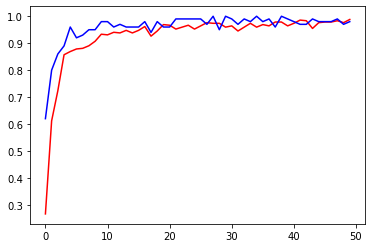

In [3]:
print(type(history))
print(history.history.keys())

plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()

In [6]:
model.save('./team_made_model.h5')

In [5]:
pretrained_network.trainable =  True    # Convolution Layer안의 parameter 동결 해제

for layer in pretrained_network.layers:
    if layer.name in ['block7b_se_reduce', 'block7b_se_expand', 'block7b_project_conv', 'top_conv']:
        layer.trainable = True  # 동결 해제
    else:
        layer.trainable = False # 동결

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator)//20,
                    steps_per_epoch=len(train_generator)//20,
                    epochs=50,
                    verbose=1)


Epoch 1/50
21/21 [==============================] - 15s 734ms/step - loss: 0.1088 - accuracy: 0.9857 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 2/50
21/21 [==============================] - 17s 799ms/step - loss: 0.1144 - accuracy: 0.9690 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 3/50
21/21 [==============================] - 17s 829ms/step - loss: 0.1364 - accuracy: 0.9738 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 4/50
21/21 [==============================] - 17s 825ms/step - loss: 0.1005 - accuracy: 0.9738 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 17s 823ms/step - loss: 0.0797 - accuracy: 0.9857 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 17s 823ms/step - loss: 0.0987 - accuracy: 0.9810 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 7/50
21/21 [==============================] - 17s 824ms/step - loss: 0.0944 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy: 1.0000

In [13]:
new_model.save('./fine_tuning_model.h5')

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


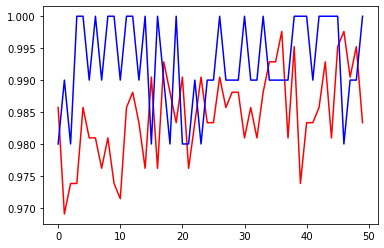

In [6]:
print(type(history))
print(history.history.keys())

plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.show()